In [36]:
import tensorflow 

In [37]:
from tensorflow.keras.datasets import fashion_mnist

In [38]:
data = fashion_mnist.load_data()

In [39]:
(x_train, y_train), (x_test, y_test) = data

In [40]:
x_train.shape

(60000, 28, 28)

In [41]:
x_train[30]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

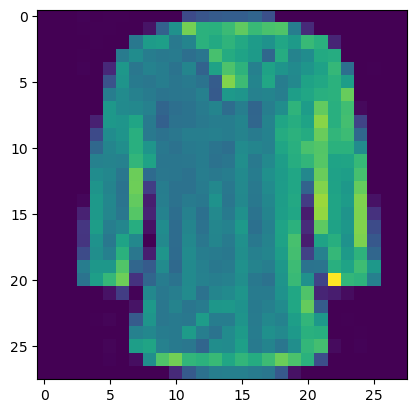

In [42]:
import matplotlib.pyplot as plt 
plt.imshow(x_test[4])

In [43]:
class_names=['0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat',
    '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']

def get_name(n):
    name = class_names[n]
    return name


6 Shirt


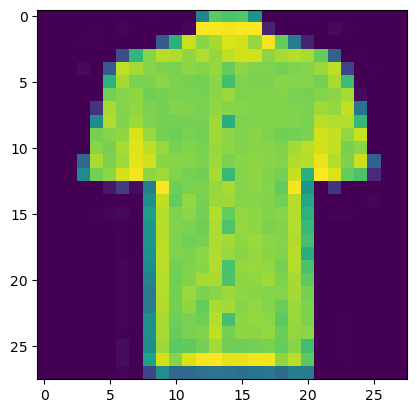

In [44]:
n=40
plt.imshow(x_test[n])
print(get_name(y_test[n]))

In [45]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [46]:
x_train = x_train/255
x_test = x_test/255

In [47]:
x_train.shape

(60000, 784)

In [48]:
x_test.shape

(10000, 784)

In [49]:
y_train.shape

(60000,)

In [50]:
y_test.shape

(10000,)

In [67]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [74]:
x_train.shape

(60000, 784)

In [75]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1_l2

l1_reg = 0.0001
l2_reg = 0.002

model.add(Dense(units=256,input_shape=(784,),activation='relu'))
model.add(Dense(units=128, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dense(units=56, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dense(units=28, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dense(units=10, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 56)                7224      
                                                                 
 dense_23 (Dense)            (None, 28)                1596      
                                                                 
 dense_24 (Dense)            (None, 10)                290       
                                                                 
 dense_25 (Dense)            (None, 256)               2816      
                                                                 
 dense_26 (Dense)            (None, 128)              

In [76]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [78]:
history = model.fit(x_train, y_train, epochs=80, validation_data=(x_test, y_test), verbose=1, batch_size=20, callbacks=(early_stop))

Epoch 1/80
3000/3000 [==============================] - 15s 5ms/step - loss: 1.0144 - sparse_categorical_accuracy: 0.7028 - val_loss: 0.7491 - val_sparse_categorical_accuracy: 0.7972
Epoch 2/80
3000/3000 [==============================] - 16s 5ms/step - loss: 0.6321 - sparse_categorical_accuracy: 0.8361 - val_loss: 0.6674 - val_sparse_categorical_accuracy: 0.8194
Epoch 3/80
3000/3000 [==============================] - 14s 5ms/step - loss: 0.5488 - sparse_categorical_accuracy: 0.8550 - val_loss: 0.5555 - val_sparse_categorical_accuracy: 0.8498
Epoch 4/80
3000/3000 [==============================] - 16s 5ms/step - loss: 0.5076 - sparse_categorical_accuracy: 0.8636 - val_loss: 0.5494 - val_sparse_categorical_accuracy: 0.8528
Epoch 5/80
3000/3000 [==============================] - 15s 5ms/step - loss: 0.4800 - sparse_categorical_accuracy: 0.8713 - val_loss: 0.5043 - val_sparse_categorical_accuracy: 0.8634
Epoch 6/80
3000/3000 [==============================] - 15s 5ms/step - loss: 0.4569 -

In [79]:
loss, accuracy =  model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4490 - sparse_categorical_accuracy: 0.8714


In [80]:
loss

0.4489665925502777

In [81]:
accuracy

0.871399998664856

In [82]:
prediction = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [85]:
prediction 

array([[6.02099931e-07, 9.08774306e-11, 5.10398240e-06, ...,
        8.84506479e-02, 4.32111876e-04, 9.08702672e-01],
       [2.47905194e-03, 3.47697596e-06, 9.78271425e-01, ...,
        8.19837430e-15, 5.42005801e-05, 3.08547820e-21],
       [8.95849371e-06, 9.98379230e-01, 8.80803054e-06, ...,
        4.30578576e-12, 1.48121733e-04, 3.56756928e-14],
       ...,
       [1.66885345e-03, 1.06357201e-03, 3.40187253e-04, ...,
        1.59432966e-04, 9.94851053e-01, 4.84644261e-06],
       [1.18419985e-05, 9.98035967e-01, 1.21258754e-05, ...,
        8.02662190e-12, 1.93024433e-04, 7.97761989e-14],
       [2.53100620e-06, 4.34170096e-11, 3.26655254e-08, ...,
        3.74302198e-03, 1.83109066e-03, 1.83682991e-04]], dtype=float32)

In [86]:
prediction.shape

(10000, 10)

In [87]:
import numpy as np 
prediction_values = np.argmax(prediction, axis=1)

In [88]:
prediction_values

array([9, 2, 1, ..., 8, 1, 5])

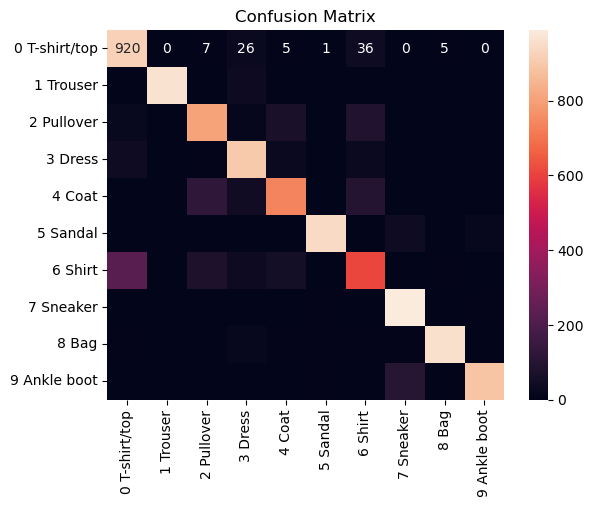

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=prediction_values, y_true=y_test)

import seaborn as sns

plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Y_test")
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.show()

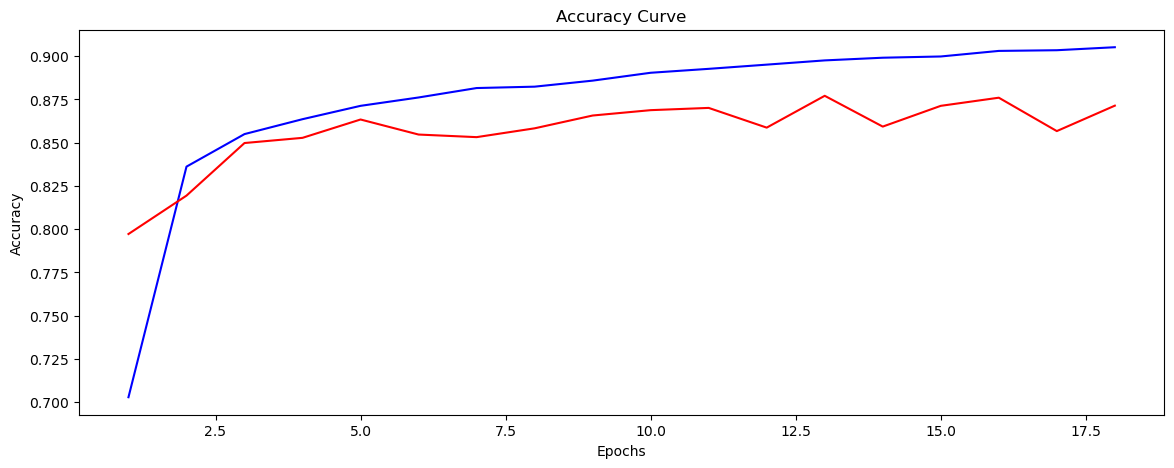

In [95]:
train_acuracy = history.history['sparse_categorical_accuracy']
test_accuracy = history.history['val_sparse_categorical_accuracy']

train_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch = range(1, len(train_acuracy)+1)
plt.figure(figsize=(14,5))
plt.plot(epoch, train_acuracy, 'b', label='Train Accuracy')
plt.plot(epoch, test_accuracy, 'r', label='Test, Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

#### 

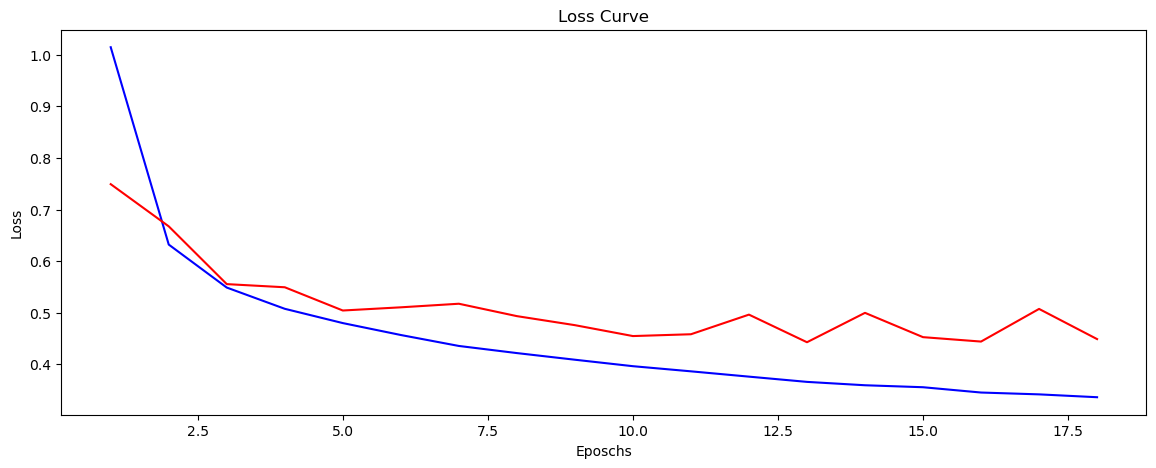

In [97]:
plt.figure(figsize=(14,5))
plt.plot(epoch, train_loss, 'b', label='Train Loss')
plt.plot(epoch, test_loss, 'r', label='Test Loss')
plt.xlabel("Eposchs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

In [98]:
model.save('model5.h5')

In [ ]:
from